In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
plt.style.use("ggplot")

In [2]:
def ResidualBlock(x, in_depth, out_depth, kernel_size=3):
    strides = ((2, 2) if in_depth != out_depth else (1, 1))
    out = Conv2D(filters=in_depth, kernel_size=kernel_size, padding="same", activation="relu")(x)
    out = BatchNormalization()(out)
    out = Conv2D(filters=out_depth, kernel_size=kernel_size, strides=strides, padding="same", activation="relu")(out)
    out = BatchNormalization()(out)
    shortcut = Conv2D(filters=out_depth, kernel_size=1, strides=strides, padding="same")(x)
    out = Add()([shortcut, out])
    out = Activation("relu")(out)
    return out

In [9]:
def BottleneckBlock(x, in_depth, out_depth):
    out = Conv2D(filters=in_depth, kernel_size=1, padding="same", activation="relu")(x)
    out = BatchNormalization()(out)
    out = Conv2D(filters=in_depth, kernel_size=3, padding="same", strides=(2, 2), activation="relu")(out)
    out = BatchNormalization()(out)
    out = Conv2D(filters=out_depth, kernel_size=1, padding="same", activation="relu")(out)
    out = BatchNormalization()(out)
    shortcut = Conv2D(filters=out_depth, kernel_size=1, strides=(2, 2), padding="same")(x)
    out = Add()([shortcut, out])
    out = Activation("relu")(out)
    return out

In [10]:
def ResNet50(inputs, out_classes=10):
    out = Conv2D(filters=64, kernel_size=7, padding="same", strides=(2, 2))(inputs)
    out = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(out)

    out = BottleneckBlock(out, 64, 256)
    out = BottleneckBlock(out, 64, 256)
    out = BottleneckBlock(out, 64, 256)

    out = BottleneckBlock(out, 128, 512)
    out = BottleneckBlock(out, 128, 512)
    out = BottleneckBlock(out, 128, 512)
    out = BottleneckBlock(out, 128, 512)

    out = BottleneckBlock(out, 256, 1024)
    out = BottleneckBlock(out, 256, 1024)
    out = BottleneckBlock(out, 256, 1024)
    out = BottleneckBlock(out, 256, 1024)
    out = BottleneckBlock(out, 256, 1024)
    out = BottleneckBlock(out, 256, 1024)

    out = BottleneckBlock(out, 512, 2048)
    out = BottleneckBlock(out, 512, 2048)
    out = BottleneckBlock(out, 512, 2048)  
    out = GlobalAveragePooling2D()(out)

    out = Flatten()(out)
    out = Dropout(0.5)(out)
    out = Dense(out_classes, activation="softmax")(out)
    return out

In [5]:
def ResNet34(inputs, out_classes=10):
    out = Conv2D(filters=64, kernel_size=7, padding="same", strides=(2, 2))(inputs)
    out = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(out)

    out = ResidualBlock(out, 64, 64)
    out = ResidualBlock(out, 64, 64)
    out = ResidualBlock(out, 64, 128)

    out = ResidualBlock(out, 128, 128)
    out = ResidualBlock(out, 128, 128)
    out = ResidualBlock(out, 128, 128)
    out = ResidualBlock(out, 128, 256)

    out = ResidualBlock(out, 256, 256)
    out = ResidualBlock(out, 256, 256)
    out = ResidualBlock(out, 256, 256)
    out = ResidualBlock(out, 256, 256)
    out = ResidualBlock(out, 256, 256)
    out = ResidualBlock(out, 256, 512)

    out = ResidualBlock(out, 512, 512)
    out = ResidualBlock(out, 512, 512)
    out = ResidualBlock(out, 512, 512)
    out = GlobalAveragePooling2D()(out)
    
    out = Flatten()(out)
    out = Dropout(0.5)(out)
    out = Dense(out_classes, activation="softmax")(out)
    return out

In [6]:
EPOCHS, BATCH_SIZE = 150, 256
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [11]:
inputs = Input(shape=(32, 32, 3))
#outputs = ResNet34(inputs)
outputs = ResNet50(inputs)
resnet = Model(inputs=inputs, outputs=outputs)
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 64)     0           conv2d_49[0][0]                  
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 7, 7, 64)     4160        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [12]:
resnet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = resnet.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

Epoch 1/150
196/196 [==============================] - 51s 263ms/step - loss: 3.1830 - accuracy: 0.1316
Epoch 2/150
196/196 [==============================] - 48s 245ms/step - loss: 2.2433 - accuracy: 0.1488
Epoch 3/150
196/196 [==============================] - 49s 250ms/step - loss: 2.2406 - accuracy: 0.1504
Epoch 4/150
196/196 [==============================] - 48s 246ms/step - loss: 2.2367 - accuracy: 0.1508
Epoch 5/150
196/196 [==============================] - 49s 249ms/step - loss: 2.2032 - accuracy: 0.1622
Epoch 6/150
196/196 [==============================] - 49s 247ms/step - loss: 2.1442 - accuracy: 0.1803
Epoch 7/150
196/196 [==============================] - 49s 249ms/step - loss: 2.1199 - accuracy: 0.1909
Epoch 8/150
196/196 [==============================] - 49s 248ms/step - loss: 2.1119 - accuracy: 0.1965
Epoch 9/150
196/196 [==============================] - 49s 248ms/step - loss: 2.0970 - accuracy: 0.2002
Epoch 10/150
196/196 [==============================] - 49s 249m

KeyboardInterrupt: ignored

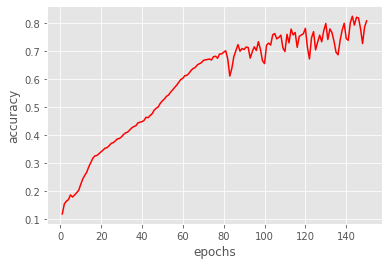

In [ ]:
plt.plot(range(1, EPOCHS+1), hist.history["accuracy"], color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

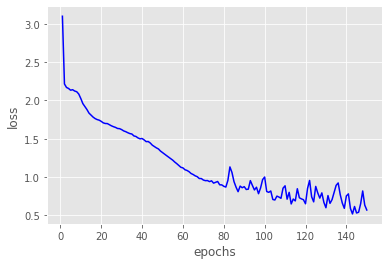

In [ ]:
plt.plot(range(1, EPOCHS+1), hist.history["loss"], color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()